# TITANIC - Machine Learning from Disaster

- Será abordado neste projeto um conjunto de dados muito famoso do Titanic que faz parte de uma competição do Kaggle.

- [Clique aqui para acessar os dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)

- Objetivo do projeto é usar o aprendizado de máquina para **criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic**

- É utilizado a **acurácia** para avaliar o resultado do modelo

**___________________________________________________________________________________________________________________________**

# DESCRIÇÃO DO DATASET

- **Variáveis**
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero	
    - Age: Idade em anos	
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic	
    - Parch: Nº de pais/filhos a bordo do Titanic		
    - Ticket: Número do bilhete		
    - Fare:	Tarifa do passageiro	
    - Cabin: Número da cabine	
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

&nbsp;

- **Notas de Variáveis**
    - pclass: Um proxy para status socioeconômico (SES)
        - 1º = Alto
        - 2º = Médio
        - 3º = Baixo
     - age: A idade é fracionária se for menor que 1. Se a idade for estimada, ela está no formato de xx.5
     - sibsp: O conjunto de dados define as relações familiares desta forma...
        - Irmão = irmão, irmã, meio-irmão, meia-irmã
        - Cônjuge = marido, esposa (amantes e noivos foram ignorados)
     - parch: O conjunto de dados define as relações familiares desta forma...
        - Pais = mãe, pai
        - Filho = filha, filho, enteada, enteado
        - Algumas crianças viajaram apenas com uma babá, portanto parch=0 para elas.

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Tratamento](#tratamento)
- [Modelagem](#modelagem)
- [Avaliação](#avaliacao)
- [Previsão](#previsao)
- [Conclusão](#conclusao)
- [Resumo](#resumo)
- [Exportação Base Final Parte 2](#exportacao)


**___________________________________________________________________________________________________________________________**
<a id='importacao'></a>
# IMPORTAÇÃO

- Vamos importar novamente as bases e replicar todos os tratamentos que foram feitos na parte 1 do projeto

In [203]:
# Importação de algumas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
# Visualizando a base de treino
treino = pd.read_csv('dataset/train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [205]:
# Visualizando a base de teste
teste = pd.read_csv('dataset/test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Fazendo o mesmo tratamento inicial que fizemos na parte 1

- Para isso, utilize o código disponível no capítulo "Resumo" do arquivo chamado "Titanic - Parte 1".

In [206]:
# Tratando a Coluna Embarked - Base de Treino
treino.loc[treino['Embarked'].isnull(), 'Embarked'] = 'S'

# Tratando a Coluna Age - Base de Treino e Teste
treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
teste['Age'].fillna(teste.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Tratando a Coluna Fare - Base de Teste
teste.loc[teste['Fare'].isnull(), 'Fare'] = 7.0

# Tratando a Coluna Sex - Base de Treino e Teste
treino['Sex_male'] = pd.get_dummies(treino['Sex'], drop_first=True, dtype='int32')
teste['Sex_male'] = pd.get_dummies(teste['Sex'], drop_first=True, dtype='int32')

# Importando OneHotEnconder
from sklearn.preprocessing import OneHotEncoder

# Tratando a Coluna Embarked - Base de Treino e Teste
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

ohe_df_treino = pd.DataFrame(ohe.fit_transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
treino = pd.concat([treino, ohe_df_treino], axis=1)

ohe_df_teste = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_df_teste], axis=1)

# Removendo as colunas
treino.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

# Removendo as colunas
teste.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [207]:
# Visualizando a base de treino
treino.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1


In [208]:
# Visualizando a base de teste
teste.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,0,0,1


- Vamos testar esta base de dados com os mesmos modelos de machine learning utilizados na parte 1 e armazenar o resultado da avaliação em um dataframe para efeito de comparação com as melhorias que iremos fazer abaixo.  [Avaliar](#avaliar)

<a id='tratamento'></a>
**No final da parte 1 do projeto, foram sugeridas algumas análises e tratamentos que podem contribuir para aumentar a acurácia do nosso modelo.**

- Após a submissão do "submission_parte1.csv" no Kaggle, obtivemos um Score: 0.76076

**Melhorias**
- Analisar se a coluna Name possui informações que possam ser úteis ao nosso modelo
- Classificar a coluna Age
- Analisar e Tratar as colunas SibSp e Parch
- Analisar e Tratar as colunas Pclass e Fare

**Vamos explorar estes pontos a seguir**

**___________________________________________________________________________________________________________________________**


# TRATAMENTO

- [Tratando a Coluna Name](#name)
- [Analisando a Coluna Sex_male](#sex_male)
- [Analisando e Tratando a Coluna Age](#age)
- [Analisando e Tratando as Colunas SibSp e Parch](#parch)
- [Analisando e Tratando as Colunas Pclass e Fare](#pclass)

<a id='name'></a>
### Tratando a Coluna Name

- Vamos analisar a coluna Name para entender se possui alguma informação que possa ajudar a melhorar o nosso modelo

- **Base de Treino**

In [253]:
# Vamos observar os nomes com mais detalhes
treino['Name'].iloc[:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- Observe que para cada registro da coluna Name, tem um título associado ao nome. Vamos extrair estas informações para cada linha e armazená-las em uma nova coluna

In [254]:
# importando a biblioteca string
import string

In [255]:
# Cria uma função que retorna apenas o título de cada registro
def title(texto):
    return ''.join([x for x in texto.split(',')[-1] if x not in string.punctuation]).split()[0]

In [256]:
# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
treino['Title'] = treino['Name'].apply(lambda x: title(x))

In [257]:
# Visualiza a base de treino
treino[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


Text(0.5, 1.0, 'Quantidade de Sobreviventes por Título')

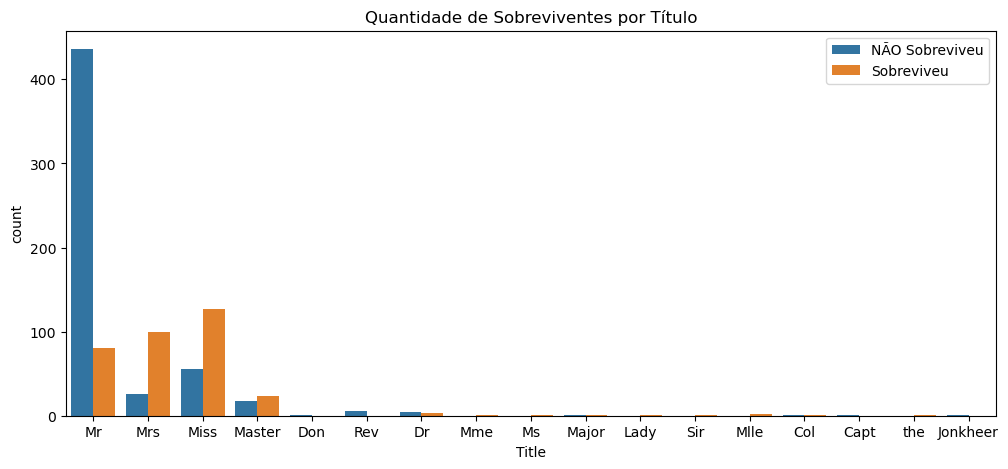

In [258]:
# Visualizando a quantidade de sobreviventes para cada título
plt.figure(figsize=(12, 5))
sns.countplot(x='Title', data=treino, hue='Survived')
plt.legend(['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Quantidade de Sobreviventes por Título')

- Podemos perceber que os títulos Mr, Mrs, Miss e Master separam relativamente bem os passageiros que sobreviveram ou não
- Vamos deixar apenas os títulos mais frequentes

In [259]:
# Visualizando os valores únicos e suas frequências
treino['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

- Vamos deixar apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"

In [260]:
# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
treino['Title'] = treino['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

In [261]:
# Visualizando novamente os valores únicos após a alteração
treino['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

- Agora vamos codificar a coluna Title para transformar os valores do tipo texto em valores numéricos

In [262]:
# transformando em numérico
treino = pd.get_dummies(treino, prefix='Title', dtype='int32', columns=['Title'])
treino.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,0,1,0,0,0


In [263]:
treino[['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others']].value_counts()

Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Others
0             0           1         0          0               517
              1           0         0          0               182
              0           0         1          0               125
1             0           0         0          0                40
0             0           0         0          1                27
Name: count, dtype: int64

- **Base de Teste**
- Agora, vamos fazer o mesmo para a base de teste

In [264]:
# Visualizando a base de treino
teste.head(3) 

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,0,1,0


In [265]:
# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
teste['Title'] = teste['Name'].apply(lambda x: title(x))

In [266]:
# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
teste['Title'] = teste['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

In [267]:
# Codificando a coluna Title para transformar os valores do tipo texto em valores numéricos
teste = pd.get_dummies(teste, prefix='Title', dtype='int32', columns=['Title'])
teste.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,0,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,0,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,0,1,0,0,0,1,0,0


- **Agora, vamos avaliar o resultado dos modelos após esta alteração**

In [268]:
# Base de treino que iremos testar agora
treino.drop(['PassengerId', 'Survived', 'Name'], axis=1).head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0


In [269]:
# Chamando a função para avaliar nossa alteração
avaliar_alteracao(['PassengerId', 'Survived', 'Name'], 'Title_Ohe')

,modelos,Inicial,Title_Ohe
0,DecisionTree,0.766102,0.762712
1,KNN,0.732203,0.752542
2,LogisticRegression,0.823729,0.840678


- Podemos perceber que houve uma melhora no nosso modelo, vamos continuar fazendo algumas alterações

<a id='sex_male'></a>
### Analisando a Coluna Sex_male
- De acordo com pesquisas, durante a evacuação do Titanic, as mulheres e crianças tiveram prioridade.
- Vamos analisar a coluna Sex_male se isso se confirma
- Sex_male = 1 (Masculino)
- Sex_male = 0 (Feminino)

In [270]:
# Quantidade de passageiros que sobreviveram por sexo
df_check = pd.crosstab(index=treino['Sex_male'], columns=treino['Survived'], margins=True)

df_check.columns = ['Não Sobreviveu', 'Sobreviveu', 'Total']
df_check.index = ['Feminino', 'Masculino', 'Total']
df_check

,Não Sobreviveu,Sobreviveu,Total
Feminino,81,233,314
Masculino,468,109,577
Total,549,342,891


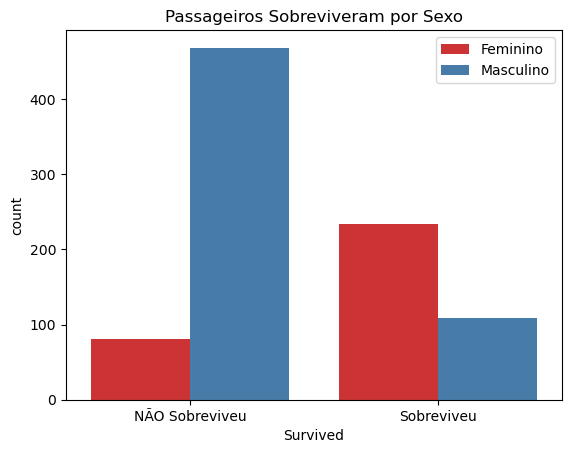

In [271]:
# Visualizando as informações da tabela acima em forma de gráfico
sns.countplot(data=treino, x='Survived', hue='Sex_male', palette='Set1')

plt.title('Passageiros Sobreviveram por Sexo')
plt.xticks(ticks = [0, 1], labels=['NÃO Sobreviveu', 'Sobreviveu'])
plt.legend(['Feminino', 'Masculino'])
plt.show()

- Podemos perceber que o sexo é um fator determinante para a sobrevivencia do passageiro.
- Isso se confirma pois durante a evacuação do Titanic, as mulheres e crianças tiveram prioridade.

<a id='age'></a>
### Analisando e Tratando a Coluna Age

- Vamos analisar a coluna Age para entender se possui alguma informação que possa melhorar o nosso modelo

- **Base de Treino**

Text(0.5, 0, 'Idades')

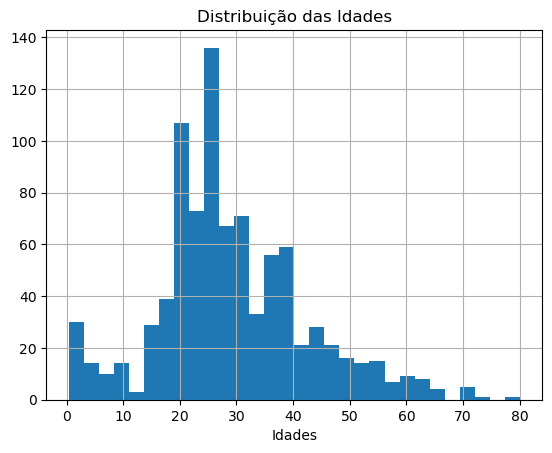

In [272]:
# Visualizando a distribuição das idades
treino['Age'].hist(bins=30)
plt.title('Distribuição das Idades')
plt.xlabel('Idades')

- Como sabemos, as mulheres e crianças tiveram prioridades na evacuação durante o naufrágio, conforme as normas de "mulheres e crianças em primeiro lugar" que estavam em vigor na época.
- Vamos então verificar a quantidade de crianças que foram salvas
- Para isso, até quantos anos podemos considerar crianças? Vamos identificar através da seguinte análise

In [273]:
# Importa a biblioteca numpy
import numpy as np

- Vamos selecionar no dataframe os passageiros que tinham idade menor ou igual a  X, vamos considerar como exemplo, passageiros <= 10 anos.
- Depois iremos verificar dos passageiros com idade menor ou igual a 10, quantos desses passageiros sobreviveram e quantos não sobreviveram, e com isso tirar a diferença.
- Caso a diferença seja um valor positivo, significa que houve mais sobreviventes
- Caso a diferença seja um valor negativo, significa que houve mais não sobreviventes

In [274]:
# Cria uma lista vazia que armazenará a diferença entre a quantidade de sobreviventes e não sobreviventes por idade
lista_sobreviventes = []

for idade in sorted(treino['Age'].unique())[9:29]:
    
    criancas = treino[treino['Age'] <=  idade]
    
    sub = np.subtract(criancas['Survived'].value_counts()[1], criancas['Survived'].value_counts()[0])
    lista_sobreviventes.append(sub)

In [275]:
# Para facilitar o entendimento, vamos criar um dataframe com as idades e o resultado da diferença entre sobreviventes
df_crianca = pd.DataFrame({'idade': sorted(treino['Age'].unique())[9:29], 'diferenca': lista_sobreviventes})
df_crianca

,idade,diferenca
0,5.0,18
1,6.0,19
2,7.0,18
3,8.0,18
4,9.0,14
5,10.0,12
6,11.0,10
7,12.0,11
8,13.0,13
9,14.0,13


- Podemos perceber que até os 17 anos, tiveram 9 sobreviventes a mais que não sobreviventes
- Apartir dos 18 anos, podemos ver uma queda nessa diferença, se tornando negativa depois, onde a quantidade de pessoas que não sobreviveram foi maior
- Com essa análise, vamos considerar crianças até 17 anos

In [276]:
# Vamos separar um dataframe apenas com crianças
treino_criancas = treino[treino['Age'] < 18]

In [277]:
# Quantidade de crianças que sobreviveram
treino_criancas['Survived'].value_counts()

Survived
1    61
0    52
Name: count, dtype: int64

Text(0.5, 1.0, 'Crianças por Classe')

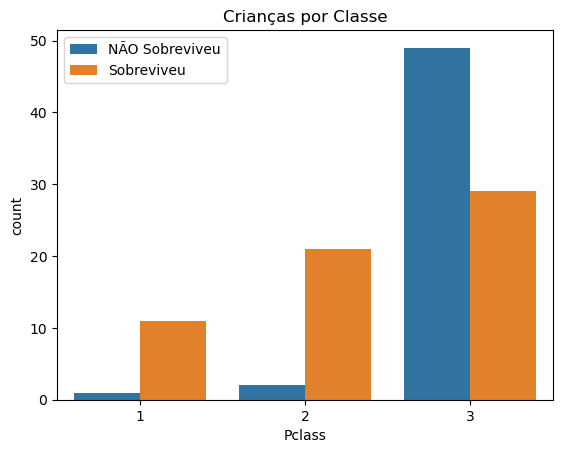

In [278]:
# Agora vamos visualizar a quantidade de crianças salvas por classe
sns.countplot(data=treino_criancas, x='Pclass', hue='Survived')
plt.legend(['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Crianças por Classe')

In [279]:
# Analisando a média de sobreviventes por classe
df_check = treino_criancas.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
df_check.columns = ['sobrev', 'total', 'tx_sobrev']
df_check

,sobrev,total,tx_sobrev
Pclass,,,
1,11,12,0.916667
2,21,23,0.913043
3,29,78,0.371795


Text(0.5, 1.0, 'Crianças Sobreviventes por Sexo')

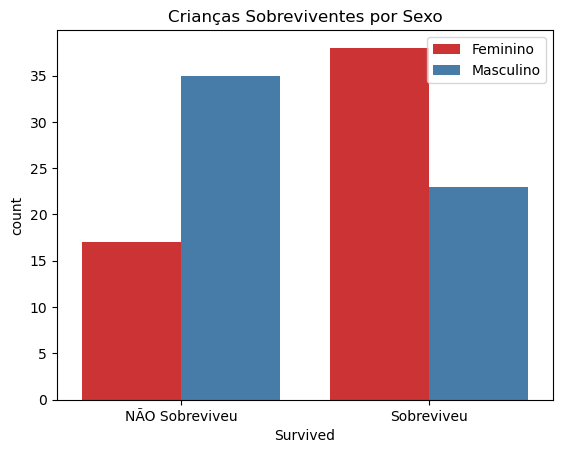

In [280]:
# Agora vamos visualizar a quantidade de crianças salvas por Sexo
sns.countplot(data=treino_criancas, x='Survived', hue='Sex_male', palette='Set1')
plt.legend(['Feminino', 'Masculino'])
plt.xticks([0, 1], ['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Crianças Sobreviventes por Sexo')

- Através da nossa análise, percebemos que a maioria das crianças da 1ª e 2ª Classe conseguiram sobreviver
- Crianças da 3ª classe não tiveram a mesma prioridade e por isso a taxa de sobrevivencia é pequena, apenas 37%
- Além disso, o sexo feminino foi maior entre os sobreviventes

In [281]:
# Criando um dataframe apenas com adultos, ou seja, idade entre 18 e 55 anos
treino_adultos = treino[(treino['Age'] >= 18) & (treino['Age'] < 55)]

In [282]:
# Quantidade de adultos que sobreviveram
treino_adultos['Survived'].value_counts()

Survived
0    468
1    268
Name: count, dtype: int64

Text(0.5, 1.0, 'Adultos por Classe')

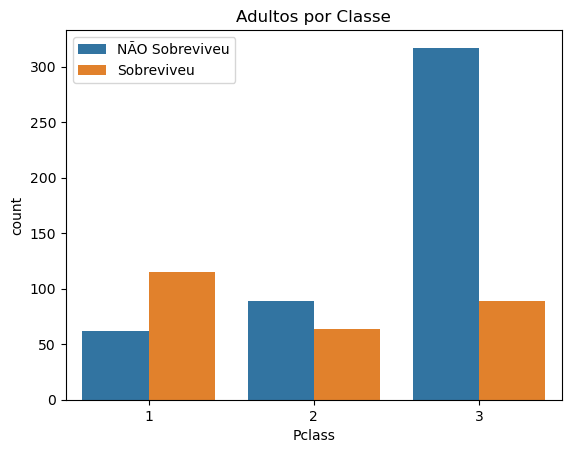

In [283]:
# Agora vamos visualizar a quantidade de adultos salvos por classe
sns.countplot(data=treino_adultos, x='Pclass', hue='Survived')
plt.legend(['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Adultos por Classe')

In [284]:
# Analisando a média de sobreviventes por classe
df_check = treino_adultos.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
df_check.columns = ['sobrev', 'total', 'tx_sobrev']
df_check

,sobrev,total,tx_sobrev
Pclass,,,
1,115,177,0.649718
2,64,153,0.418301
3,89,406,0.219212


Text(0.5, 1.0, 'Adultos Sobreviventes por Sexo')

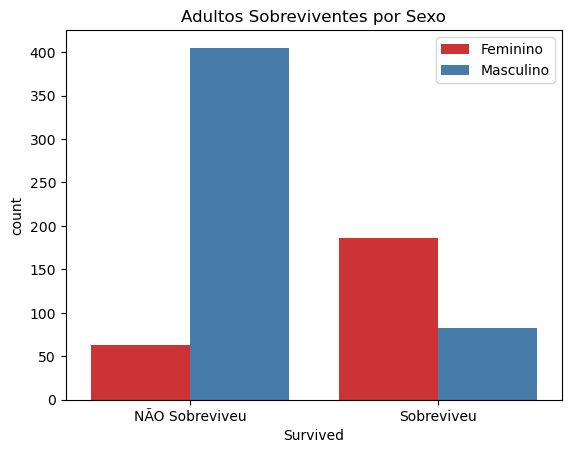

In [285]:
# Agora vamos visualizar a quantidade de adultos salvos por Sexo
sns.countplot(data=treino_adultos, x='Survived', hue='Sex_male', palette='Set1')
plt.legend(['Feminino', 'Masculino'])
plt.xticks([0, 1], ['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Adultos Sobreviventes por Sexo')

In [286]:
# Criando um dataframe apenas com idosos, ou seja, idade acima dos 54 anos
treino_idosos = treino[treino['Age'] >= 55]

In [287]:
# Quantidade de idosos que sobreviveram
treino_idosos['Survived'].value_counts()

Survived
0    29
1    13
Name: count, dtype: int64

Text(0.5, 1.0, 'Idosos por Classe')

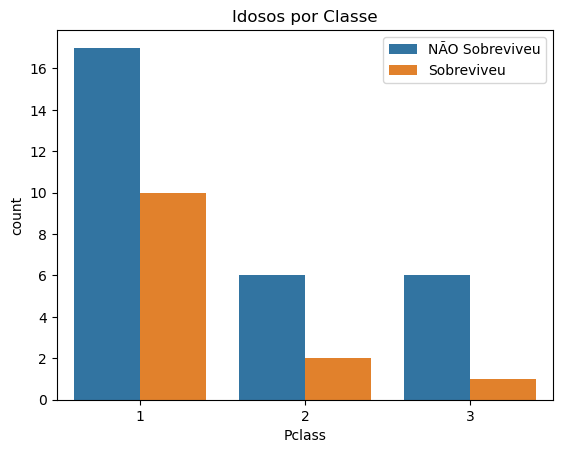

In [288]:
# Agora vamos visualizar a quantidade de idosos salvos por classe
sns.countplot(data=treino_idosos, x='Pclass', hue='Survived')
plt.legend(['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Idosos por Classe')

Text(0.5, 1.0, 'Idosos Sobreviventes por Sexo')

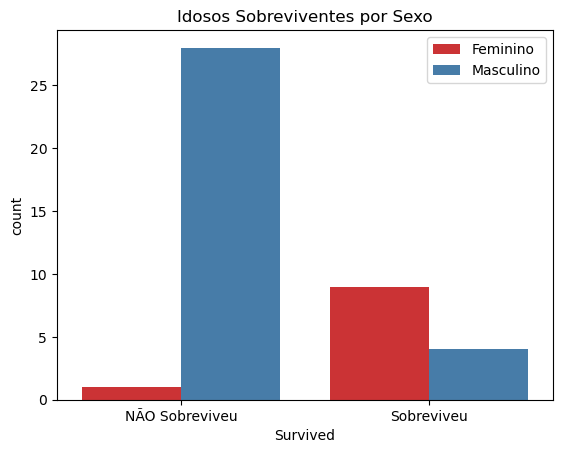

In [289]:
# Agora vamos visualizar a quantidade de idosos salvos por Sexo
sns.countplot(data=treino_idosos, x='Survived', hue='Sex_male', palette='Set1')
plt.legend(['Feminino', 'Masculino'])
plt.xticks([0, 1], ['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('Idosos Sobreviventes por Sexo')

- **O que podemos concluir através dessas análises acima?**
    - Passageiros da 1ª classe tiveram mais chance de sobreviver
    - Passageiros do sexo feminino tiveram mais chances de sobreviver
    - A maior parte das crianças que sobreviveram eram da 1ª e 2ª classe

- **Vamos criar uma coluna para classificar as idades em criança, adulto e idoso**
    - Para isso, vamos codificar da seguinte forma:
        - crianças = 1
        - adultos = 2
        - idosos = 3

In [290]:
# Função para classificar as idades
def classifica_idade(idade):
    if idade < 18:
        return 1
    elif idade >= 18 and idade < 55:
        return 2
    else:
        return 3

In [291]:
# Criando uma coluna com a classificação das idades para a base de treino
treino['Classe_Idade'] = treino['Age'].apply(lambda x: classifica_idade(x))

In [292]:
# Criando uma coluna com a classificação das idades para a base de teste
teste['Classe_Idade'] = teste['Age'].apply(lambda x: classifica_idade(x))

- **Agora, vamos avaliar o resultado dos modelos após esta alteração**

In [293]:
# Visualizando a nossa base de treino
treino.drop(['PassengerId', 'Survived', 'Name', 'Age'], axis=1).head(2)

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade
0,3,1,0,7.2500,1,0,0,1,0,0,1,0,0,2
1,1,1,0,71.2833,0,1,0,0,0,0,0,1,0,2


In [294]:
# Vamos avaliar nossa alteração após adicionar as colunas de Classe Idade
avaliar_alteracao(['PassengerId', 'Survived', 'Name', 'Age'], 'Classe_Idade')

,modelos,Inicial,Title_Ohe,Classe_Idade
0,DecisionTree,0.766102,0.762712,0.823729
1,KNN,0.732203,0.752542,0.786441
2,LogisticRegression,0.823729,0.840678,0.830508


- Interessante! Agora que classificamos as idades em três grupos, tivemos uma melhora no classificador DecisionTree e KNN. Vamos continuar tratando

<a id='parch'></a>
### Analisando e Tratando as Colunas SibSp e Parch

<Axes: >

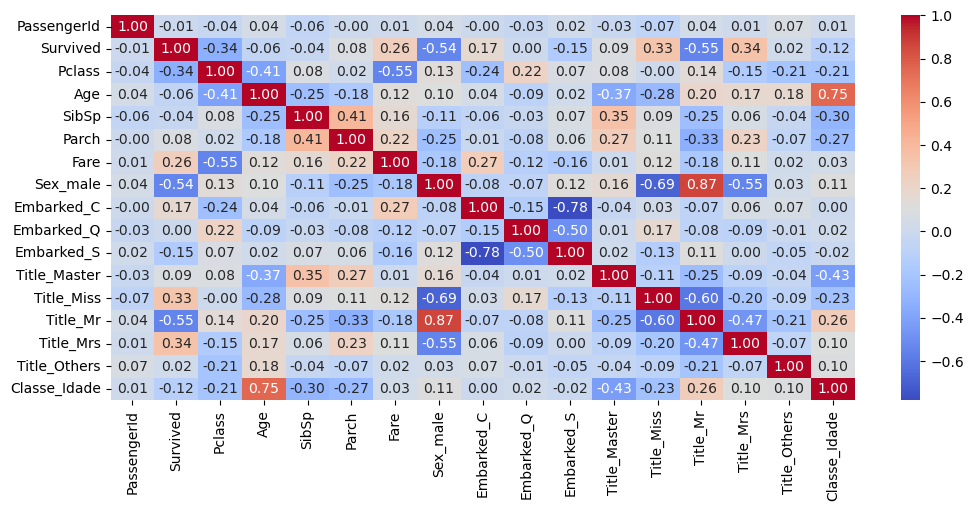

In [295]:
# Correlação entre as variáveis da base
plt.figure(figsize=(12, 5))
sns.heatmap(treino.drop('Name', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')

- As colunas **SibSp** e **Parch** possuem correlação **baixa com a coluna Survived**
- As duas colunas parecem  ter uma certa correlação

In [296]:
# Visualizando os valores da coluna SibSp e sua frequencia
treino['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Text(0.5, 1.0, 'SibSp')

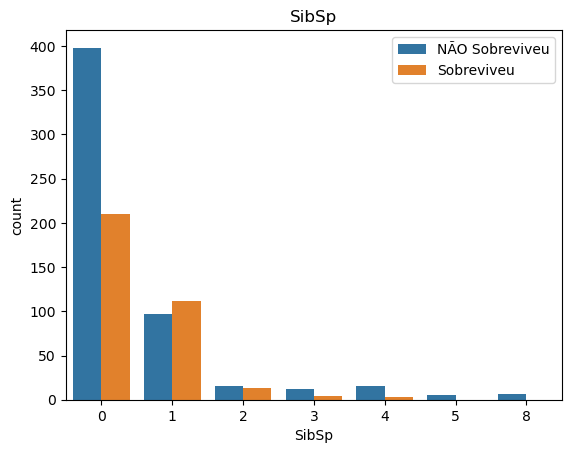

In [297]:
# Visualizando a contagem de passageiros que estavam acompanhados pelo irmão ou esposa e filtrando pela sobrevivencia
sns.countplot(data=treino, x='SibSp', hue='Survived')
plt.legend(['NÃO Sobreviveu', 'Sobreviveu'])
plt.title('SibSp')

- **Análise do gráfico**
    - Podemos perceber que grande parte dos passageiros viajaram sozinhos, e a maior parte desses passageiros não sobreviveram.
        - Por isso devemos nos perguntar, quem sobreviveu e quem morreu?
        - Quantos eram mulheres e quantos eram homens?

In [298]:
# Analisando a quantidade de passageiros que viajaram sozinho e cruzando as informações entre sexo e sobrevivencia
df_check = pd.crosstab(index=treino[treino['SibSp']==0]['Sex_male'], columns=treino[treino['SibSp']==0]['Survived'], margins=True)

df_check.columns = ['Não Sobreviveu', 'Sobreviveu', 'Total']
df_check.index = ['Feminino', 'Masculino', 'Total']
df_check

,Não Sobreviveu,Sobreviveu,Total
Feminino,37,137,174
Masculino,361,73,434
Total,398,210,608


- A Tabela acima mostra todos os passageiros que viajaram sozinho (SipSp = 0)
- Dos 210 passageiros que sobreviveram, 137 (65,23%) foram mulheres e 73 (34,77%) homens
- Dos 398 passageiros que NÃO sobreviveram, 37 (9,29%) foram mulheres e 361 (90,71%) homens

- No gráfico abaixo podemos visualizar esta diferença entre os sexos

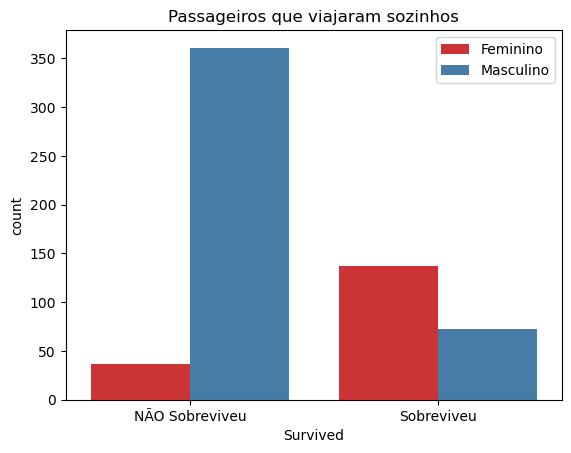

In [299]:
# Visualizando a tabela acima em forma de gráfico

sns.countplot(data=treino[treino['SibSp']==0], x='Survived', hue='Sex_male', palette='Set1')

plt.title('Passageiros que viajaram sozinhos')
plt.xticks(ticks = [0, 1], labels=['NÃO Sobreviveu', 'Sobreviveu'])
plt.legend(['Feminino', 'Masculino'])
plt.show()

- Agora, vamos fazer a mesma análise para SibSp = 1

In [300]:
# Analisando a quantidade de passageiros que viajaram com mais uma pessoa e cruzando as informações entre sexo e sobrevivencia
df_check = pd.crosstab(index=treino[treino['SibSp']==1]['Sex_male'], columns=treino[treino['SibSp']==1]['Survived'], margins=True)

df_check.columns = ['Não Sobreviveu', 'Sobreviveu', 'Total']
df_check.index = ['Feminino', 'Masculino', 'Total']
df_check

,Não Sobreviveu,Sobreviveu,Total
Feminino,26,80,106
Masculino,71,32,103
Total,97,112,209


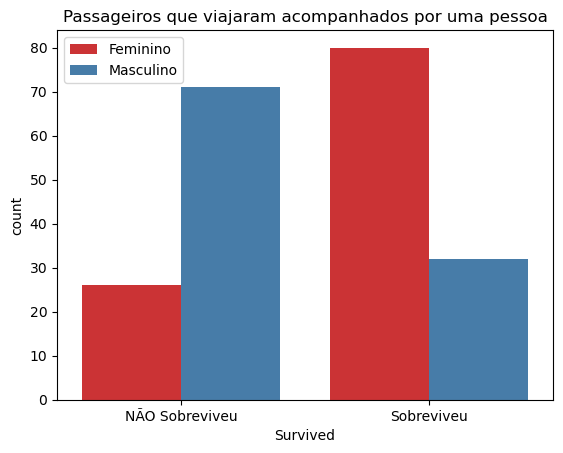

In [301]:
# Visualizando a tabela acima em forma de gráfico

sns.countplot(data=treino[treino['SibSp']==1], x='Survived', hue='Sex_male', palette='Set1')

plt.title('Passageiros que viajaram acompanhados por uma pessoa')
plt.xticks(ticks = [0, 1], labels=['NÃO Sobreviveu', 'Sobreviveu'])
plt.legend(['Feminino', 'Masculino'])
plt.show()

- **Fazendo a mesma analise com a Coluna Parch**

In [302]:
# Visualizando os valores da coluna Parch e sua frequencia
treino['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

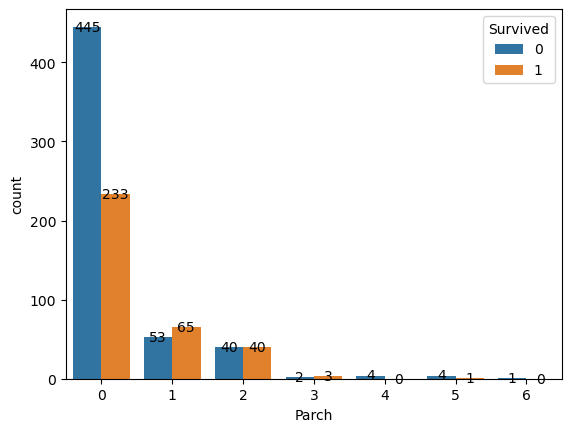

In [303]:
# Visualizando a contagem de passageiros da coluna Parch e filtrando pela sobrevivencia
ax = sns.countplot(data=treino, x='Parch', hue='Survived', )

# Adicionar a contagem em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X da posição
        height,                          # Y da posição
        f'{int(height)}',                # Texto
        ha="center",                      # Alinhamento horizontal
        va="center"                       # Alinhamento vertical
    )
    
plt.show()

In [304]:
# Analisando a quantidade de passageiros que viajaram sozinho e cruzando as informações entre sexo e sobrevivencia
df_check = pd.crosstab(index=treino[treino['Parch']==0]['Sex_male'], columns=treino[treino['Parch']==0]['Survived'], margins=True)

df_check.columns = ['Não Sobreviveu', 'Sobreviveu', 'Total']
df_check.index = ['Feminino', 'Masculino', 'Total']
df_check

,Não Sobreviveu,Sobreviveu,Total
Feminino,41,153,194
Masculino,404,80,484
Total,445,233,678


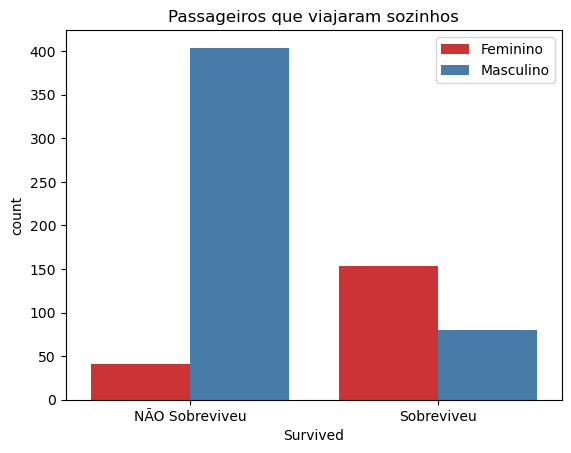

In [305]:
# Visualizando a tabela acima em forma de gráfico

sns.countplot(data=treino[treino['Parch']==0], x='Survived', hue='Sex_male', palette='Set1')

plt.title('Passageiros que viajaram sozinhos')
plt.xticks(ticks = [0, 1], labels=['NÃO Sobreviveu', 'Sobreviveu'])
plt.legend(['Feminino', 'Masculino'])
plt.show()

**Análise das colunas SipSp e Parch**

- As colunas SipSp e Parch tem baixa correlação com a coluna Survived.
- Ao observar com maiores detalhes a coluna SibSp e Parch, percebemos que a maioria dos passageiros viajaram sozinhos, ou seja, SibSp = 0 e Parch = 0
- Analisando esses passageiros que viajaram sozinhos, a maior parte deles NÃO sobreviveram
- Quem são esses passageiros que sobreviveram? Quem não sobreviveu?
    - Para SibSp = 0
        - Dos 210 passageiros que sobreviveram, 137 (65,23%) foram mulheres
        - Dos 398 passageiros que NÃO sobreviveram, 361 (90,71%) homens
    - Ao fazer a mesma análise com a coluna Parch, podemos notar que a maior parte dos passageiros que viajaram sozinhos e que sobreviveram eram mulheres e grande parte dos não sobreviventes eram homens.
- Fazendo a mesma análise para aqueles que estavam acompanhados por uma pessoa, SibSp = 1 e Parch = 1, podemos perceber o mesmo padrão. A maioria dos sobreviventes eram mulheres e grande parte dos não sobreviventes eram homens.

- Podemos concluir com isso que viajar sozinho ou acompanhado não possui tanta relevância para a sobrevivência. O que realmente importa é o sexo da pessoa, para mulheres a chance de sobreviver é muito maior que para homens.

- **Vamos unir as duas colunas**
    - As duas colunas representam quantidade de acompanhantes, vamos unir as duas colunas em apenas uma

In [306]:
# Unindo SipSp e Parch para a base de treino
treino['Family'] = treino['SibSp'] + treino['Parch']

# Unindo SipSp e Parch para a base de teste
teste['Family'] = teste['SibSp'] + teste['Parch']

- **Agora, vamos avaliar o resultado dos modelos após esta alteração**

In [307]:
# Visualizando a nossa base de treino
treino.drop(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch'], axis=1).head(2)

,Pclass,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family
0,3,7.2500,1,0,0,1,0,0,1,0,0,2,1
1,1,71.2833,0,1,0,0,0,0,0,1,0,2,1


In [308]:
# Vamos avaliar nossa alteração após adicionar a coluna Family
avaliar_alteracao(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch'], 'Family')

,modelos,Inicial,Title_Ohe,Classe_Idade,Family
0,DecisionTree,0.766102,0.762712,0.823729,0.816949
1,KNN,0.732203,0.752542,0.786441,0.803390
2,LogisticRegression,0.823729,0.840678,0.830508,0.833898


- Tivemos uma pequena melhora apenas no classificador KNN. Vamos continuar tratando

<a id='pclass'></a>
### Analisando e Tratando as Colunas Pclass e Fare

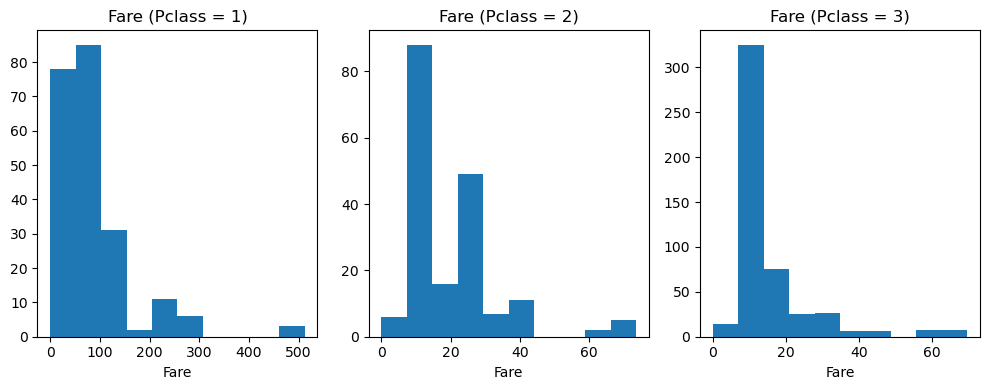

In [309]:
# Visualizando a distribuição do valor das passagens por classe
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].hist(treino[treino['Pclass']==1]['Fare'])
ax[1].hist(treino[treino['Pclass']==2]['Fare'])
ax[2].hist(treino[treino['Pclass']==3]['Fare'])

ax[0].set_title('Fare (Pclass = 1)')
ax[1].set_title('Fare (Pclass = 2)')
ax[2].set_title('Fare (Pclass = 3)')

ax[0].set_xlabel('Fare')
ax[1].set_xlabel('Fare')
ax[2].set_xlabel('Fare')

plt.tight_layout()

In [310]:
# Entendendo a relação entre Pclass x Fare
treino.groupby(['Pclass'])['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


- Observe que o valor mínimo de cada classe é zero, ou seja, alguns passageiros não pagaram nada para embarcar e alguns deles ainda ficaram na primeira ou segunda classe, por que isso aconteceu?
    - Vamos analisar esses passageiros
- Observe também que cada classe possui outliers pois os valores máximos estão bem distantes da mediana

In [311]:
# Visualizando passageiros que pagaram valor baixo e ficaram na primeira classe
treino[(treino['Fare'] < 26) & (treino['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family
168,169,0,1,"Baumann, Mr. John D",40.0,0,0,25.9250,1,0,0,1,0,0,1,0,0,2,0
263,264,0,1,"Harrison, Mr. William",40.0,0,0,0.0000,1,0,0,1,0,0,1,0,0,2,0
633,634,0,1,"Parr, Mr. William Henry Marsh",40.0,0,0,0.0000,1,0,0,1,0,0,1,0,0,2,0
662,663,0,1,"Colley, Mr. Edward Pomeroy",47.0,0,0,25.5875,1,0,0,1,0,0,1,0,0,2,0
796,797,1,1,"Leader, Dr. Alice (Farnham)",49.0,0,0,25.9292,0,0,0,1,0,0,0,0,1,2,0
806,807,0,1,"Andrews, Mr. Thomas Jr",39.0,0,0,0.0000,1,0,0,1,0,0,1,0,0,2,0
815,816,0,1,"Fry, Mr. Richard",40.0,0,0,0.0000,1,0,0,1,0,0,1,0,0,2,0
822,823,0,1,"Reuchlin, Jonkheer. John George",38.0,0,0,0.0000,1,0,0,1,0,0,0,0,1,2,0
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292,0,0,0,1,0,0,0,1,0,2,0
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,5.0000,1,0,0,1,0,0,1,0,0,2,0


In [312]:
# Visualizando passageiros que NÃO pagaram para embarcar
treino[treino['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family
179,180,0,3,"Leonard, Mr. Lionel",36.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
263,264,0,1,"Harrison, Mr. William",40.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
271,272,1,3,"Tornquist, Mr. William Henry",25.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",30.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",30.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
466,467,0,2,"Campbell, Mr. William",30.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",30.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
597,598,0,3,"Johnson, Mr. Alfred",49.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0
633,634,0,1,"Parr, Mr. William Henry Marsh",40.0,0,0,0.0,1,0,0,1,0,0,1,0,0,2,0


- Após algumas pesquisas, foi possível identificar alguns motivos que explicam o valor da passagem igual a zero e um valor baixo para alguns passageiros da primeira classe. Podemos listar os seguintes motivos:
    - Funcionários do "Grupo de Garantia" da Harland and Wolff não pagaram nada. Harland & Wolff: Grupo de Garantia Titanic foi uma equipe de Belfast enviada pelos construtores navais Harland & Wolff para acompanhar o Titanic em sua viagem inaugural.
    - Muitos deles tratavam-se de tripulantes do Titanic, como marinheiros.
    - Secretário, criado pessoal do dono do navio, Sr. Joseph Bruce Ismay
    - Bilhete que eram de cortesias
    - Promoções e Descontos
    - Cabines de Primeira Classe Inferiores: Nem todas as cabines de primeira classe eram iguais. Algumas eram menores, menos luxuosas ou em localizações menos desejáveis dentro do navio. Essas cabines mais modestas tinham preços mais baixos.
    - Conexões e Parcerias

- **Classificando a Coluna Fare**
- Vamos agora classificar a coluna Fare da seguinte forma:
    - 0: Valor Gratuito
    - 1: Valor Alto
    - 2: Valor Médio
    - 3: Valor Baixo
    
- Para isso precisamos definir limites para cada classe, vamos analisar

<Axes: xlabel='Pclass', ylabel='Fare'>

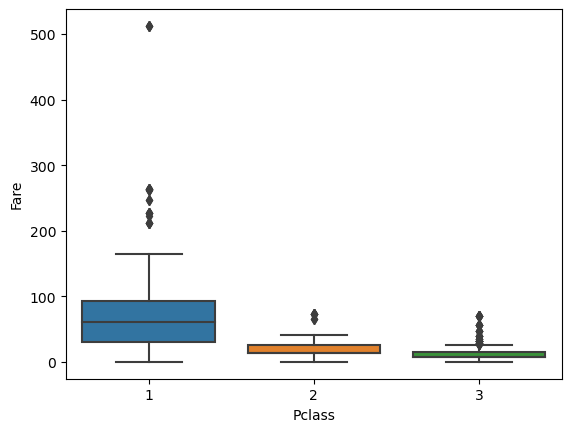

In [313]:
# Observe que a coluna Fare possui Outliers
sns.boxplot(data=treino, x = 'Pclass', y='Fare')

In [314]:
# Analisando as tarifas de cada classe novamente
treino.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


- Como vimos, cada classe possui outliers que interferem no valor da nossa média
- Vamos remover os outliers e então verificar a nova média e a mediana para cada classes
- E então, após remover os outliers podemos ter um valor um pouco mais real da nossa média e com isso definir os limites das classes

In [315]:
# Agora, vamos fazer um looping para armazenar as médias e medianas após a remoção dos outliers
media = []
mediana = []

for i in range(1, 4):
    classe = treino[treino['Pclass'] == i]
    media.append(classe[classe['Fare'] <= classe['Fare'].quantile(0.95)]['Fare'].mean())
    mediana.append(classe[classe['Fare'] <= classe['Fare'].quantile(0.95)]['Fare'].median())

In [316]:
# Observe a média e a médiana SEM OUTLIERS
pd.DataFrame({'Pclass': [1, 2, 3], 'mean': media, 'median': mediana})

,Pclass,mean,median
0,1,71.066504,56.9292
1,2,18.273587,13.5000
2,3,11.785508,8.0500


- Perceba que ao remover os outliers, as médias mudaram
- Vamos então utilizar esses valores para definir os limites para cada classe

In [317]:
# Cria uma função de classificação:
def classifica_fare(fare):
    if fare == 0:
        return 0 # Valor Gratuito
    elif fare > 0 and fare <= 18:
        return 3 # Valor Baixo
    elif fare > 18 and fare <= 71:
        return 2 # Valor Médio
    else:
        return 1 # Valor Alto

In [318]:
# Criando uma coluna com as classificações
treino['Classe_Fare'] = treino['Fare'].apply(lambda x: classifica_fare(x))

# Criando uma coluna com as classificações
teste['Classe_Fare'] = teste['Fare'].apply(lambda x: classifica_fare(x))

In [319]:
# Quantidade de sobreviventes por Classe_Fare
treino.groupby('Classe_Fare')['Survived'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Classe_Fare,,,
0,15,1,0.066667
1,103,75,0.728155
2,286,134,0.468531
3,487,132,0.271047


In [320]:
# Quantidade de sobreviventes por Pclass
treino.groupby(['Pclass'])['Survived'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


- **Agora, vamos avaliar o resultados dos modelos**

In [321]:
# Visualizando a nossa base de treino
treino.drop(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1).head(2)

,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,1,0,1,0,0,0,0,0,1,0,2,1,1


In [322]:
# Vamos avaliar nossa alteração
avaliar_alteracao(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare'], 'Classe_Fare')

,modelos,Inicial,Title_Ohe,Classe_Idade,Family,Classe_Fare
0,DecisionTree,0.766102,0.762712,0.823729,0.816949,0.786441
1,KNN,0.732203,0.752542,0.786441,0.803390,0.830508
2,LogisticRegression,0.823729,0.840678,0.830508,0.833898,0.847458


- Agora, vamos analisar graficamente o dataframe com a acurácia dos modelos para facilitar a comparação

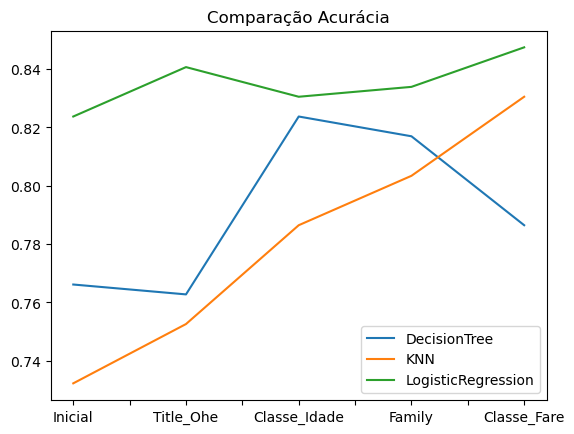

In [323]:
df_avaliacao.iloc[0, 1:].plot(label='DecisionTree')
df_avaliacao.iloc[1, 1:].plot(label='KNN')
df_avaliacao.iloc[2, 1:].plot(label='LogisticRegression')

plt.title('Comparação Acurácia')

plt.legend()

### Removendo Colunas
- Vamos utilizar a base de dados utilizada acima, sem as seguintes colunas: 'Name', 'Age', 'SibSp', 'Parch', 'Fare'. Esta base obteve a maior acurácia com o modelo de Regressão Logística
- Para isso, vamos remover permanentemente essas colunas

In [324]:
# Base de treino
treino.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

In [325]:
# Base de teste
teste.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

<a id='avaliar'></a> 
### Usando essa nova base no modelo

In [330]:
# Visualizando a base
treino.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1


**___________________________________________________________________________________________________________________________**
<a id='modelagem'></a>
# MODELAGEM

- Para começar, vamos testar os seguintes modelos:
    - **Decision Tree**
        - https://scikit-learn.org/stable/modules/tree.html#classification
    - **KNeighborsClassifier**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - **Logistic Regression**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [331]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [332]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

In [333]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree

In [334]:
# Fazendo a importação
from sklearn import tree

In [335]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [336]:
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

In [337]:
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

### KNeighborsClassifier

In [338]:
# Importando
from sklearn.neighbors import KNeighborsClassifier

In [339]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [340]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

In [341]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

### Logistic Regression

In [342]:
# Importando
from sklearn.linear_model import LogisticRegression

In [343]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42, max_iter=400)

In [344]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [345]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

**___________________________________________________________________________________________________________________________**
<a id='avaliacao'></a>
# AVALIAÇÃO

- Para fazer essa análise, podemos usar:
    - Acurácia (método de avaliação usado na competição):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### Acurácia

In [346]:
# Importando
from sklearn.metrics import accuracy_score

In [347]:
# Para a árvore
arvore = accuracy_score(y_val, y_pred_ac)
print('Acurácia DecisionTree:', arvore)

Acurácia DecisionTree: 0.7864406779661017


In [348]:
# Para o knn
knn = accuracy_score(y_val, y_pred_knn)
print('Acurácia KNN:', knn)

Acurácia KNN: 0.8305084745762712


In [349]:
# Para a regressão logística
reg_log = accuracy_score(y_val, y_pred_rl)
print('Acurácia LogisticRegression:', reg_log)

Acurácia LogisticRegression: 0.847457627118644


### Matriz de confusão

In [350]:
# Importando
from sklearn.metrics import confusion_matrix

In [351]:
# Para a árvore
confusion_matrix(y_val, y_pred_ac)

array([[156,  19],
       [ 44,  76]], dtype=int64)

In [352]:
# Para o knn
confusion_matrix(y_val, y_pred_knn)

array([[153,  22],
       [ 28,  92]], dtype=int64)

In [353]:
# Para a regressão logística
confusion_matrix(y_val, y_pred_rl)

array([[155,  20],
       [ 25,  95]], dtype=int64)

### Data Frame para comparar a performance do modelo com diferentes tratamentos

In [248]:
# Cria um dataframe para comparar a acurácia das nossas alterações
df_avaliacao = pd.DataFrame({'modelos': ['DecisionTree', 'KNN', 'LogisticRegression']})

In [249]:
# Adiciona uma coluna e insere os resultados das avaliações
df_avaliacao['Inicial'] = arvore, knn, reg_log

In [250]:
# Mostra o dataframe
df_avaliacao

,modelos,Inicial
0,DecisionTree,0.766102
1,KNN,0.732203
2,LogisticRegression,0.823729


- Podemos ver acima, o resultado da nossa base de dados inicial.
- Para simplificar nossa análise, vamos criar uma função que englobe todos os passos mencionados anteriormente: criação do modelo, treinamento e teste. Por fim, essa função retornará um dataframe comparativo, exibindo a nova métrica de avaliação após as alterações que realizarmos ao longo do notebook.

### Função de Avaliação

- Vamos executar esta função e sempre que quisermos avaliar nossas alterações na base, basta chamar a função, inserir como parâmetro as colunas que não fazem parte da nossa análise e o nome que iremos dar para a nossa alteração

In [251]:
def avaliar_alteracao(drop_colunas, avaliacao):

    ###################### Importando o train_test_split
    from sklearn.model_selection import train_test_split
    # Separando a base de treino em X e y
    X = treino.drop(drop_colunas,axis=1)
    y = treino.Survived

    # Separando em treino e validação
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

    ###################### Árvore de classificação
    # Fazendo a importação
    from sklearn import tree
    # Criando o classificador
    clf_ac = tree.DecisionTreeClassifier(random_state=42)
    # Fazendo o fit com os dados
    clf_ac = clf_ac.fit(X_train,y_train)
    # Fazendo a previsão
    y_pred_ac = clf_ac.predict(X_val)

    ###################### KNeighborsClassifier
    # Importando
    from sklearn.neighbors import KNeighborsClassifier
    # Criando o classificador
    clf_knn = KNeighborsClassifier(n_neighbors=3)
    # Fazendo o fit com os dados
    clf_knn = clf_knn.fit(X_train,y_train)
    # Fazendo a previsão
    y_pred_knn = clf_knn.predict(X_val)

    ###################### Regressão Logística
    # Importando
    from sklearn.linear_model import LogisticRegression
    # Criando o classificador
    clf_rl = LogisticRegression(random_state=42, max_iter=500)
    # Fazendo o fit com os dados
    clf_rl = clf_rl.fit(X_train,y_train)
    # Fazendo a previsão
    y_pred_rl = clf_rl.predict(X_val)


    ###################### Acurácia
    # Importando
    from sklearn.metrics import accuracy_score
    # Para a árvore
    arvore = accuracy_score(y_val, y_pred_ac)
    # Para o knn
    knn = accuracy_score(y_val, y_pred_knn)
    # Para a regressão logística
    reg_log = accuracy_score(y_val, y_pred_rl)

    ### Data Frame para comparar a performance do modelo com diferentes tratamentos    
    df_avaliacao[avaliacao] = [arvore, knn, reg_log]

    return df_avaliacao

In [252]:
# Testando a função, perceba que irá retornar os mesmos valores do DataFrame criado acima
avaliar_alteracao(['PassengerId', 'Survived', 'Name'], 'Inicial')

# ['PassengerId', 'Survived', 'Name'] - São colunas que NÃO iremos utilizar no nosso modelo
# 'Inicial' - Nome da Coluna

,modelos,Inicial
0,DecisionTree,0.766102
1,KNN,0.732203
2,LogisticRegression,0.823729


- Agora, podemos **[voltar](#tratamento)** e continuar fazendo os ajustes necessários na nossa base

**___________________________________________________________________________________________________________________________**
<a id='previsao'></a>
# PREVISÃO

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [354]:
# Visualizando o X_train
X_train.head(2)

,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
6,1,1,0,0,1,0,0,1,0,0,2,0,2
718,3,1,0,1,0,0,0,1,0,0,2,0,3


In [355]:
# Visualizando a base de teste
teste.head(2)

,PassengerId,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,892,3,1,0,1,0,0,0,1,0,0,2,0,3
1,893,3,0,0,0,1,0,0,0,1,0,2,1,3


In [356]:
# Para a base de teste ser igual a base de treino, precisamos eliminar algumas colunas
X_teste = teste.drop(['PassengerId'],axis=1)

- Para fazer previsão nos dados de teste, vamos treinar novamente o modelo com a melhor acurácia, mas agora com todos os valores de treino

In [357]:
# Importando
from sklearn.linear_model import LogisticRegression

# Criando o classificador
clf_rl = LogisticRegression(random_state=42, max_iter=400)

# Fazendo o fit com TODOS os dados de treino
clf_rl = clf_rl.fit(X, y)

- Fazendo a previsão nos dados de teste, os dados que ainda não foram "vistos" pelo nosso modelo

In [358]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [359]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [360]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]
base_envio.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [361]:
# Exportando para um csv
base_envio.to_csv('submission/submission_parte2.csv',index=False)

- Agora que temos os resultados previstos pelo nosso modelo, podemos ir ao [Kaggle](https://www.kaggle.com/competitions/titanic/submissions) e fazer a submissão e verificar qual foi a acurácia do modelo.

**___________________________________________________________________________________________________________________________**
<a id='conclusao'></a>
# CONCLUSÃO

- Após a submissão do "submission_parte1.csv" no Kaggle, obtivemos um Score: 0.76076
- Após a submissão do "submission_parte2.csv" no Kaggle, obtivemos um Score: 0.77033

**Melhorias**
- Testar algoritmos mais avançados
- Realizar a validação cruzada
- Feature Selection
- Fazer o tunning do modelo com o GridSearchCV

**___________________________________________________________________________________________________________________________**
<a id='resumo'></a>
# RESUMO

### Parte 1

**Tratamento**
- Coluna Embarked valores nulos atualizados com o valor "S"
- Coluna Fare valores nulos atualizados com o valor 7.0
- Coluna Age, os valores nulos foram substituidos pela mediana das idades de acordo com a classe (Pclass) e o sexo (Sex)
- Coluna Cabin foi removida devido a alta cardinalidade e muitos valores nulos
- Coluna Sex foi transformada para numérica com valores 1 para male e 0 para female
- Coluna Embarked foi transformada em numérica utilizando o método OneHotEncoder
- Coluna Name e Ticket foi removida por possuir alta cardinalidade

**Modelagem e Avaliação**
- Foram criados três modelos para fazer a previsão
    - Acurácia DecisionTree: 0.76
    - Acurácia KNN: 0.73
    - Acurácia LogisticRegression: 0.82

**Submissão Kaggle (LogisticRegression)**
- Score: 0.76076

### Parte 2

**Tratamento**
- Coluna Name: foi retirado o título pertencente a cada registro e então codificado com o OneHotEncoder.
- Coluna Age: foi criado uma classificação para as idades, sendo elas, criança, adulto e idoso e então codificado em numérico.
- Coluna SibSp e Parch: foi criado uma nova coluna Family que é a soma dos valores das colunas SibSp e Parch
- Coluna Fare: foi criado uma nova coluna que classifica a coluna Fare em categorias

**Modelagem e Avaliação**
- Foram criados três modelos para fazer a previsão
    - Acurácia DecisionTree: 0.78
    - Acurácia KNN: 0.83
    - Acurácia LogisticRegression: 0.84
    
    
**Submissão Kaggle (LogisticRegression)**
- Score: 0.77033

### Código dos tratamentos
```
######################## PARTE 1 #######################################
# Tratando a Coluna Embarked - Base de Treino
treino.loc[treino['Embarked'].isnull(), 'Embarked'] = 'S'

# Tratando a Coluna Age - Base de Treino e Teste
treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
teste['Age'].fillna(teste.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Tratando a Coluna Fare - Base de Teste
teste.loc[teste['Fare'].isnull(), 'Fare'] = 7.0

# Tratando a Coluna Sex - Base de Treino e Teste
treino['Sex_male'] = pd.get_dummies(treino['Sex'], drop_first=True, dtype='int32')
teste['Sex_male'] = pd.get_dummies(teste['Sex'], drop_first=True, dtype='int32')

# Importando OneHotEnconder
from sklearn.preprocessing import OneHotEncoder

# Tratando a Coluna Embarked - Base de Treino e Teste
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

ohe_df_treino = pd.DataFrame(ohe.fit_transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
treino = pd.concat([treino, ohe_df_treino], axis=1)

ohe_df_teste = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_df_teste], axis=1)

# Removendo as colunas
treino.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

# Removendo as colunas
teste.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

######################## PARTE 2 #######################################

# importando a biblioteca string
import string

# Cria uma função que retorna apenas o título de cada registro
def title(texto):
    return ''.join([x for x in texto.split(',')[-1] if x not in string.punctuation]).split()[0]

# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
treino['Title'] = treino['Name'].apply(lambda x: title(x))

# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
treino['Title'] = treino['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

# transformando em numérico
treino = pd.get_dummies(treino, prefix='Title', dtype='int32', columns=['Title'])

# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
teste['Title'] = teste['Name'].apply(lambda x: title(x))

# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
teste['Title'] = teste['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

# Codificando a coluna Title para transformar os valores do tipo texto em valores numéricos
teste = pd.get_dummies(teste, prefix='Title', dtype='int32', columns=['Title'])

# Função para classificar as idades
def classifica_idade(idade):
    if idade < 18:
        return 1
    elif idade >= 18 and idade < 55:
        return 2
    else:
        return 3

# Criando uma coluna com a classificação das idades para a base de treino
treino['Classe_Idade'] = treino['Age'].apply(lambda x: classifica_idade(x))

# Criando uma coluna com a classificação das idades para a base de teste
teste['Classe_Idade'] = teste['Age'].apply(lambda x: classifica_idade(x))

# Unindo SipSp e Parch para a base de treino
treino['Family'] = treino['SibSp'] + treino['Parch']

# Unindo SipSp e Parch para a base de teste
teste['Family'] = teste['SibSp'] + teste['Parch']

# Cria uma função de classificação:
def classifica_fare(fare):
    if fare == 0:
        return 0 # Valor Gratuito
    elif fare > 0 and fare <= 18:
        return 3 # Valor Baixo
    elif fare > 18 and fare <= 71:
        return 2 # Valor Médio
    else:
        return 1 # Valor Alto

# Criando uma coluna com as classificações
treino['Classe_Fare'] = treino['Fare'].apply(lambda x: classifica_fare(x))

# Criando uma coluna com as classificações
teste['Classe_Fare'] = teste['Fare'].apply(lambda x: classifica_fare(x))

# Removendo as colunas da base de treino
treino.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

# Removendo as colunas da base de teste
teste.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
```

**___________________________________________________________________________________________________________________________**
<a id='exportacao'></a>
# EXPORTAÇÃO BASE FINAL PARTE 2
- **Base de Treino**

In [362]:
treino.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1


In [363]:
treino.to_csv('dataset_parte2/train_parte2.csv', index = False)

- **Base de Teste**

In [364]:
teste.head(2)

,PassengerId,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare,Survived
0,892,3,1,0,1,0,0,0,1,0,0,2,0,3,0
1,893,3,0,0,0,1,0,0,0,1,0,2,1,3,1


In [365]:
teste.drop('Survived', axis=1).to_csv('dataset_parte2/test_parte2.csv', index = False)